## 5. Input grid types

In [1]:
import earthkit.data
import earthkit.maps

### Equirectangular latitude-longitude projection

In [2]:
earthkit.data.download_example_file("era5-2m-temperature-dec-1993.grib")
data = earthkit.data.from_source("file", "era5-2m-temperature-dec-1993.grib")

{'central_longitude': 0.0}
{'semimajor_axis': 6378137.0, 'ellipse': 'WGS84'}
{'central_longitude': 0.0}
{'semimajor_axis': 6378137.0, 'ellipse': 'WGS84'}
{'central_longitude': 0.0}
{'semimajor_axis': 6378137.0, 'ellipse': 'WGS84'}


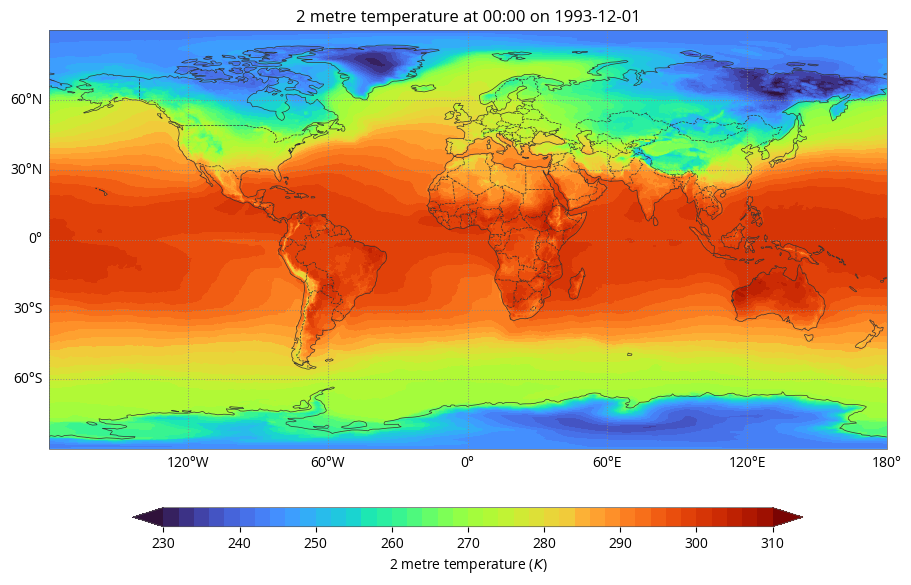

In [3]:
earthkit.maps.quickplot(data)

### Non-equirectangular data

In [11]:
earthkit.data.download_example_file("efas.nc")
data = earthkit.data.from_source("file", "efas.nc")
data.ls()

,variable,level,time,units
0,dis06,None,None,m**3 s**-1
1,land_binary_mask,None,None,1
2,upArea,None,None,M2


In [12]:
data.to_xarray()

<xarray.Dataset>
Dimensions:                       (y: 950, x: 1000)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 ... 7.525e+05
  * x                             (x) float64 2.502e+06 2.508e+06 ... 7.498e+06
    time                          datetime64[ns] ...
    step                          timedelta64[ns] ...
    surface                       float64 ...
    latitude                      (y, x) float64 dask.array<chunksize=(950, 1000), meta=np.ndarray>
    longitude                     (y, x) float64 dask.array<chunksize=(950, 1000), meta=np.ndarray>
    valid_time                    datetime64[ns] ...
Data variables:
    dis06                         (y, x) float32 dask.array<chunksize=(950, 1000), meta=np.ndarray>
    lambert_azimuthal_equal_area  int32 ...
    land_binary_mask              (y, x) int8 dask.array<chunksize=(950, 1000), meta=np.ndarray>
    upArea                        (y, x) float32 dask.array<chunksize=(950, 1000), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-11-10T10:57 GRIB to CDM+CF via cfgrib-0.9.9...

{'central_latitude': 52.0, 'central_longitude': 10.0, 'false_easting': 4321000.0, 'false_northing': 3210000.0}
{'ellipse': 'GRS80'}
{'central_latitude': 52.0, 'central_longitude': 10.0, 'false_easting': 4321000.0, 'false_northing': 3210000.0}
{'ellipse': 'GRS80'}
{'central_latitude': 52.0, 'central_longitude': 10.0, 'false_easting': 4321000.0, 'false_northing': 3210000.0}
{'ellipse': 'GRS80'}


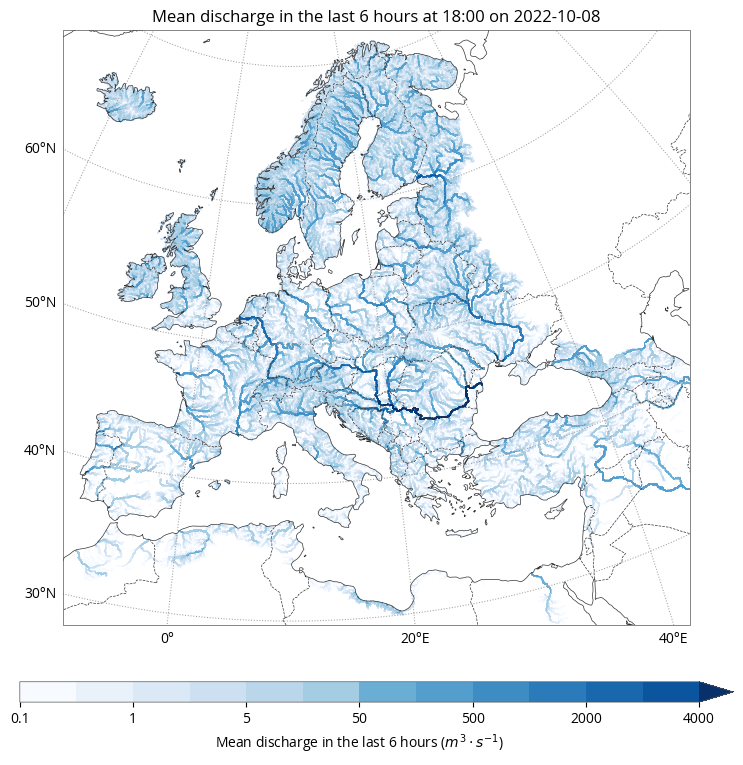

In [6]:
earthkit.maps.quickplot(data[0])

### Reduced gaussian grids

In [7]:
data = earthkit.data.from_source(
    "url", 
    "https://get.ecmwf.int/repository/test-data/earthkit-regrid/test-data/global_0_360/O32.grib",
)
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,surface,0,20231010,1200,0,an,0,reduced_gg


In [8]:
data.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, values: 5248)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2023-10-10T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
    latitude    (values) float64 ...
    longitude   (values) float64 ...
    valid_time  (time, step) datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    t2m         (number, time, step, surface, values) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-11T16:22 GRIB to CDM+CF via cfgrib-0.9.1...

{'central_longitude': 0.0}
{'semimajor_axis': 6378137.0, 'ellipse': 'WGS84'}
{'central_longitude': 0.0}
{'semimajor_axis': 6378137.0, 'ellipse': 'WGS84'}


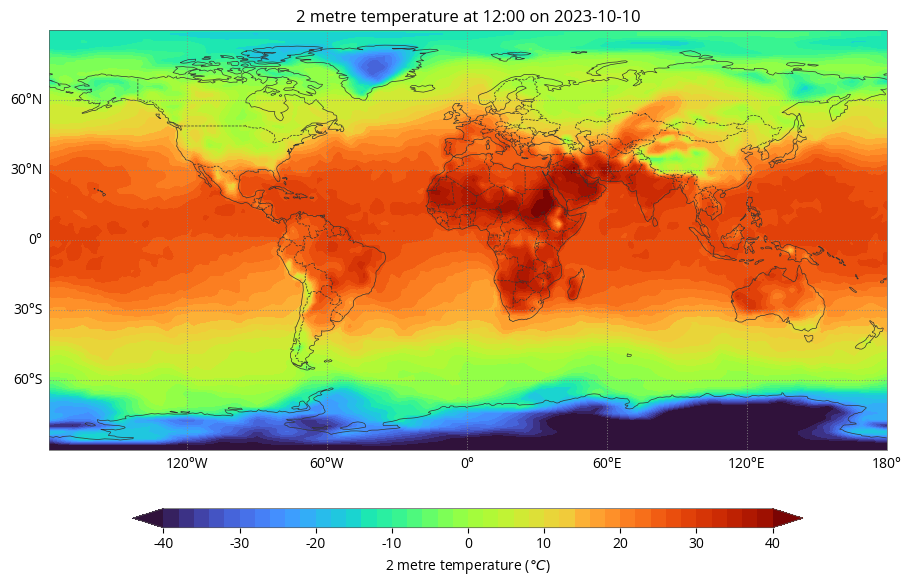

In [9]:
earthkit.maps.quickplot(data, units="celsius")